In [1]:
import tensorflow as tf
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

# load the training and test data    
(tr_x, tr_y), (te_x, te_y) = fashion_mnist.load_data()

# reshape the feature data
tr_x = tr_x.reshape(tr_x.shape[0], 784)
te_x = te_x.reshape(te_x.shape[0], 784)


# noramlise feature data
tr_x = tr_x / 255.0
te_x = te_x / 255.0

print( "Shape of training features ", tr_x.shape)
print( "Shape of test features ", te_x.shape)


# one hot encode the training labels and get the transpose
tr_y = np_utils.to_categorical(tr_y,10)
tr_y = tr_y.T
print ("Shape of training labels ", tr_y.shape)

# one hot encode the test labels and get the transpose
te_y = np_utils.to_categorical(te_y,10)
te_y = te_y.T
print ("Shape of testing labels ", te_y.shape)

Shape of training features  (60000, 784)
Shape of test features  (10000, 784)
Shape of training labels  (10, 60000)
Shape of testing labels  (10, 10000)


In [3]:
# gives the probability values asscoiated with the class
def softmax_activation(X):
  expo = tf.exp(X - tf.reduce_max(X, axis=0))
  s = tf.reduce_sum(expo, axis=0, keepdims=True)
  output =  expo / s
  return output

In [4]:
def forward_pass( X , W1 , b1, W2 , b2):
  #push all the weights and data along with the bias through the first layer
  hypo_1 = tf.matmul(W1 , X) + b1
  relu_act1 = tf.nn.relu(hypo_1)

  hypo_2 = tf.matmul(W2 , relu_act1 ) + b2
  pred_output = softmax_activation(hypo_2)
  return pred_output 

In [5]:
def cross_entropy(tr_y , predictedYProb):
  #Element wise
  reduce_sum = -tf.reduce_sum(tr_y * tf.math.log(predictedYProb),axis = 0)
  loss =  tf.cast(tf.reduce_mean(reduce_sum), tf.float64)
  return loss


In [6]:
def calculate_accuracy(Y , predictedYProb):
  predictedYValues = tf.round(predictedYProb)  
  #we need only those values whose actualy value being 1 matches the predicted value being 1
  pred_correction = tf.cast(tf.equal(np.argmax(predictedYValues, axis = 0),np.argmax(Y, axis = 0)),tf.float64)  
  accuracy_sum = tf.reduce_sum(pred_correction)
  acc_score = accuracy_sum / Y.shape[1]
  return acc_score
  


In [7]:
def gradient_descent(Xtrain,Ytrain, Xtest, Ytest, W1 , b1 , W2 , b2):
  learning_rate = 0.001
  adam_optimizer = tf.keras.optimizers.Adam(learning_rate)

  train_loss_list =[]
  train_acc_list = []

  test_loss_list = []
  test_acc_list = []

  no_of_iter = 500

  for i in range(no_of_iter + 1):
    #GradientTape will record all the operation till it encounters gradient
    with tf.GradientTape() as tape:
      train_predictedYProb  = forward_pass(Xtrain, W1 , b1 , W2 , b2 )
      train_loss = cross_entropy(Ytrain ,train_predictedYProb)

    gradients = tape.gradient(train_loss,[W1 , b1 , W2 , b2])
    train_accuracy  = calculate_accuracy(Ytrain ,train_predictedYProb)
    
    test_predictedYProb  = forward_pass(Xtest, W1 , b1 , W2 , b2 )
    test_loss = cross_entropy(Ytest ,test_predictedYProb)
    test_accuracy = calculate_accuracy(Ytest ,test_predictedYProb)
    
    train_loss_list.append(train_loss.numpy())
    train_acc_list.append(train_accuracy.numpy())
    test_loss_list.append(test_loss.numpy())
    test_acc_list.append(test_accuracy.numpy())

    adam_optimizer.apply_gradients(zip(gradients , [W1 , b1 , W2 , b2]))

    print("Train Iteration :", i , "Training Loss :",train_loss.numpy() , "Training Accuracy",train_accuracy.numpy())
    print("Test Iteration :", i , "Test Loss :",test_loss.numpy() , "test Accuracy",test_accuracy.numpy())

  return train_loss_list , train_acc_list , test_loss_list, test_acc_list
 


In [8]:
# # for easy multiplication now the shape of X_train(784,60000) and X_test(784,10000)
# take transpose of X(number of samples)
X_train = tf.convert_to_tensor(tr_x.T, dtype=tf.float64)
X_test  = tf.convert_to_tensor(te_x.T,dtype= tf.float64)
tr_y =    tf.convert_to_tensor(tr_y ,dtype= tf.float64)
te_y =    tf.convert_to_tensor(te_y ,dtype= tf.float64)

no_of_neurons = 200
#describes the number of types of clothes(10)
no_of_output_units  = 10
no_of_features = X_train.shape[0]

# define the weight whos shape is as the no_of_neurons ; but the weights cannot be same . because if we give same weights then the layers won't learn properly to produce different outputs
# Multiply with small factor , its just a way to initialize the weights, we can experiment keeping (0.01) or removing (0.01)

W1 = tf.Variable(tf.random.normal(shape=(no_of_neurons, no_of_features), dtype=tf.float64) * 0.01)
#define the bais as vector of zeros 
b1 = tf.Variable(tf.zeros((no_of_neurons, 1),dtype=tf.float64))

W2 = tf.Variable(tf.random.normal(shape=(no_of_output_units, no_of_neurons), dtype=tf.float64) * 0.01)
# b2 = tf.cast(tf.Variable(tf.zeros((no_of_output_units, 1))), tf.float64)
b2 = tf.Variable(tf.zeros((no_of_output_units, 1),dtype=tf.float64))

train_loss_list , train_acc_list , test_loss_list, test_acc_list = gradient_descent(X_train,tr_y,X_test,te_y, W1 , b1 , W2 , b2)


Train Iteration : 0 Training Loss : 2.303540126709316 Training Accuracy 0.1
Test Iteration : 0 Test Loss : 2.3035314668495457 test Accuracy 0.1
Train Iteration : 1 Training Loss : 2.267115318151695 Training Accuracy 0.1
Test Iteration : 1 Test Loss : 2.2672966248245343 test Accuracy 0.1
Train Iteration : 2 Training Loss : 2.2261160732092153 Training Accuracy 0.1
Test Iteration : 2 Test Loss : 2.2264604208778795 test Accuracy 0.1
Train Iteration : 3 Training Loss : 2.17521541837616 Training Accuracy 0.1
Test Iteration : 3 Test Loss : 2.1757842444868403 test Accuracy 0.1
Train Iteration : 4 Training Loss : 2.116819940594053 Training Accuracy 0.1
Test Iteration : 4 Test Loss : 2.117681442061837 test Accuracy 0.1
Train Iteration : 5 Training Loss : 2.0514764249279374 Training Accuracy 0.1
Test Iteration : 5 Test Loss : 2.052703387781309 test Accuracy 0.1
Train Iteration : 6 Training Loss : 1.9803336776954252 Training Accuracy 0.1
Test Iteration : 6 Test Loss : 1.9819927096737628 test Accur

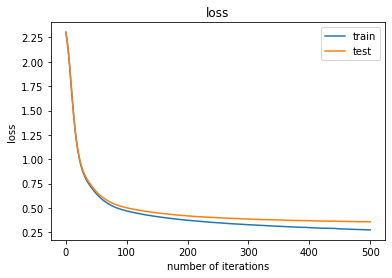

In [9]:
plt.plot(train_loss_list)
plt.plot(test_loss_list)
plt.title("loss")
plt.xlabel('number of iterations')
plt.ylabel("loss")
plt.legend(['train', 'test'], loc='upper right')

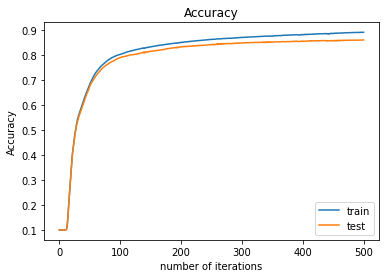

In [10]:
plt.plot(train_acc_list)
plt.plot(test_acc_list)
plt.title("Accuracy")
plt.xlabel('number of iterations')
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='lower right')


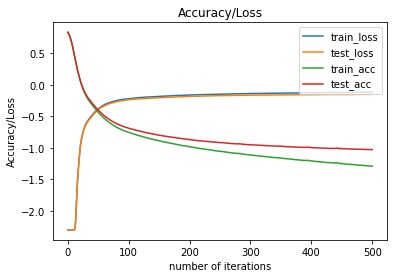

In [11]:
plt.plot(np.log(train_acc_list))
plt.plot(np.log(test_acc_list))
plt.plot(np.log(train_loss_list))
plt.plot(np.log(test_loss_list))
plt.title("Accuracy/Loss")
plt.xlabel('number of iterations')
plt.ylabel("Accuracy/Loss")
plt.legend(['train_loss', 'test_loss','train_acc', 'test_acc'], loc='upper right')